In [2]:
import xarray as xr
import glob
import numpy as np
import matplotlib.pyplot as plt

import cluster_SSL

import seaborn as sns

In [3]:
sns.set_theme(style="whitegrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

In [4]:
import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

# Select dataset

In [5]:
flist = glob.glob('F:GLIDER2018/Echosounder/Echosounder/nc_files/GLIDER_SB_2018_v5-Phase0-D2018062*-?.nc')
nfile = flist[145]
nfile

'F:GLIDER2018/Echosounder/Echosounder/nc_files\\GLIDER_SB_2018_v5-Phase0-D20180625-T063658-1.nc'

# Load and smooth

C:\Users\mbd\anaconda3\envs\phd-env\lib\site-packages\xarray\core\alignment.py:307: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
C:\Users\mbd\anaconda3\envs\phd-env\lib\site-packages\xarray\core\alignment.py:307: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)


window depth=528
window time=4


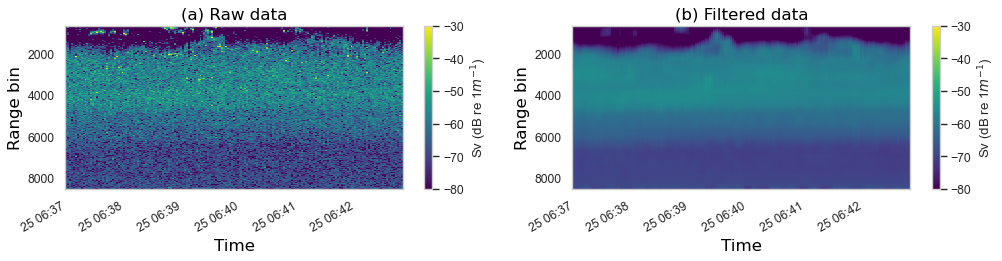

In [6]:
ds = cluster_SSL.get_backscatter(nfile, maxSNR=50)
ds_s = cluster_SSL.smooth_backscatter(ds)

In [7]:
stacked = ds_s.stack(z=('ping_time', 'range_bin'))

#range_bin to range
bin_size = np.mean(np.diff(ds.range))

# Cluster

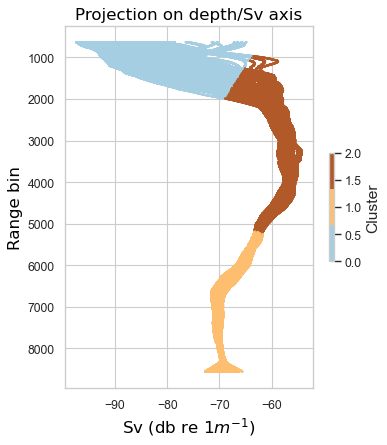

In [8]:
nclusters = 3
res = cluster_SSL.cluster_backscatter(ds_s, factor=2, n_clusters=nclusters)

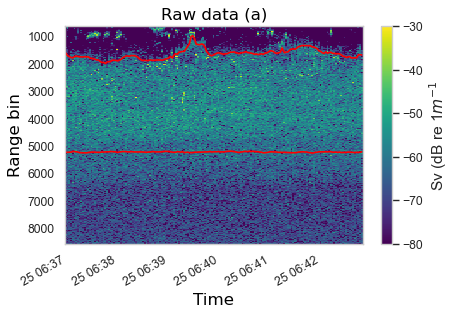

In [16]:
top_layer, bottom_layer = cluster_SSL.select_cluster(res,cluster_id=2)

# Plot figure

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12, 12))

mesh = ax[0][0].pcolormesh(ds_s['ping_time'].data, ds_s['range_bin'].data*bin_size, ds_s['Sv'].data.T, cmap="viridis", vmin=-80, vmax=-30)
ax[0][0].plot(res['ping_time'].data, top_layer.data*bin_size, color='red')
ax[0][0].plot(res['ping_time'].data, bottom_layer.data*bin_size, color='red')
ax[0][0].set_ylabel('Range (m)', axis_font)
ax[0][0].set_xlabel('Time', axis_font)
ax[0][0].invert_yaxis()
ax[0][0].set_title('A) Raw data', title_font)
cbar = fig.colorbar(mesh, ax=ax[0][0])
cbar.set_label('Sv (dB re 1$m^{-1}$)')

sc = ax[0][1].scatter(stacked['Sv'].data, stacked['range_bin'].data*bin_size, c='k', s=1)
ax[0][1].set_ylabel('Range(m)', axis_font)
ax[0][1].set_xlabel('Sv (dB re 1$m^{-1}$)', axis_font)
ax[0][1].invert_yaxis()
ax[0][1].set_title('B) Projection on depth/Sv axis raw data', title_font)


mesh = ax[1][0].pcolormesh(ds_s['ping_time'].data, ds_s['range_bin'].data*bin_size, ds_s['Sv_smooth'].data.T, cmap="viridis", vmin=-80, vmax=-30)

ax[1][0].set_ylabel('Range (m)', axis_font)
ax[1][0].set_xlabel('Time', axis_font)
ax[1][0].invert_yaxis()
ax[1][0].set_title('C) Filtered data', title_font)
cbar = fig.colorbar(mesh, ax=ax[1][0])
cbar.set_label('Sv (dB re 1$m^{-1}$)')

sc = ax[1][1].scatter(stacked['Sv_smooth'].data, stacked['range_bin'].data*bin_size, s=1,  c=res['clusters_kmean'], cmap=plt.cm.get_cmap('Paired', nclusters))
ax[1][1].set_ylabel('Range (m)', axis_font)
ax[1][1].set_xlabel('Sv (dB re 1$m^{-1}$)', axis_font)
ax[1][1].invert_yaxis()
ax[1][1].set_title('D) Projection on depth/Sv axis filtered', title_font)
cbar = fig.colorbar(sc, ax=ax[1][1], shrink=0.5, ticks=range(0,nclusters))
cbar.set_label('Cluster')

# fig.set_title('Mean filtering to remove noise')
fig.savefig('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/JASA_manuscript/2021-05 v JASA_LaTeXPackage_2/SSLkmeans.eps', format='eps', dpi = 300, facecolor='w', bbox_inches='tight')